# LDA Analysis 1

Now that I have collected data from analyzing the optimization of my LDA, I would like to analyze the output to come to a decision as to which parameters I would like to fine tune my model on. In order to conduct this analysis, I will train a sci-kit learn `RandomForestRegressor` on the optimization data. Next, I will use matplotlib to visualize the most important features for the coherence score, as well as the number of features by coherence score. This will allow me to determine the number of features to choose, and which features of that number to choose.

The first step is to import and prepare the data for training the model:

In [22]:
# Import models
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# Load and prepare data
data = pd.read_csv("../../../data/optimization/lda_optimization1.csv", index_col=None)
data.drop(data.columns[0], axis=1, inplace=True)
X = data.drop("score", axis=1)
y = data.score

Next, I will train the `RandomForestRegressor` on my optimization data:

In [23]:

from sklearn.ensemble import RandomForestRegressor


# Train Random Forest model to calculate feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestRegressor(random_state=42)

Now I must create a barplot of the features as to their contribution to the coherence score:

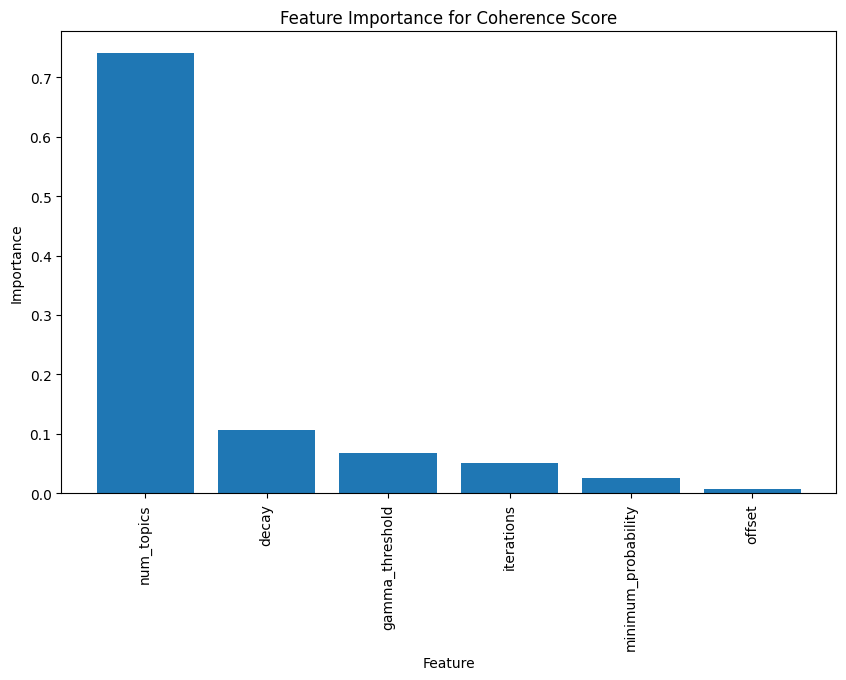

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(10, 6))
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance for Coherence Score")
plt.show()

It's clear from this bar plot that the `num_topics` parameter is far more important than the other parameters used to train the LDA model.

Next, I will visualize the optimal dimensional of my search space. Ideally, there will be a point of diminishing returns that will clearly display the optimal number of dimensions.

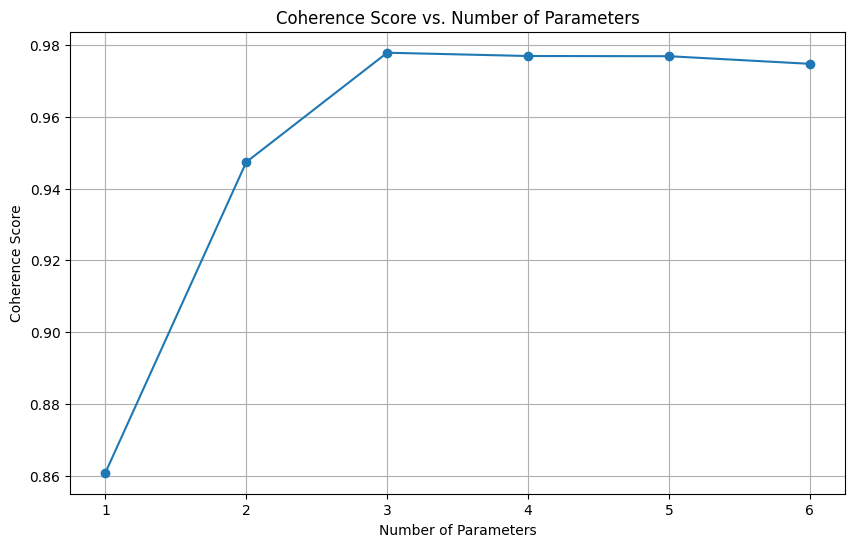

In [26]:
# Determine the best number of features
num_features = range(1, len(X.columns) + 1)
scores = []

for i in num_features:
    # Select top i features based on importance
    top_features = X.columns[indices][:i]
    X_subset = X[top_features]
    # Train model and evaluate performance (you can use cross-validation here)
    rf_subset = RandomForestRegressor(n_estimators=100, random_state=42)
    score = rf_subset.fit(X_subset, y).score(X_subset, y)
    scores.append(score)

# Plotting performance vs. number of features
plt.figure(figsize=(10, 6))
plt.plot(num_features, scores, marker="o")
plt.xlabel("Number of Parameters")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Parameters")
plt.grid(True)
plt.show()

As I can see, there is clearly a convergence after the 3rd parameter is added.

## Summary

In summary, there is a clear parameter of most important when training the gensim LDA on song lyrics: `num_topics`. This is to be expected, as it is typically the defining factor in the quality of the topics output by an LdaModel. Second and third are `decay` and `gamma_threshold` respectively.

As for the number of parameters to conduct further optimization on when optimizing my model, there is a clear point of convergence after 3 parameters are selected. While two more do add to the quality of the topics, they are not significant. In order to reduce computing cost, I will keep to a search space of 3 dimensions.

The 3 dimensional search space will consist of `num_topics`, `decay`, and `gamma_threshold`. In order to optimize this search space, I have identified the optimal default parameters for the other features I will not be optimizing the model on as:
- `offset`: 1
- `iterations`: 100
- `minimum_probability`: 0.01
